In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [0]:
from keras.utils import np_utils
from keras.layers import Dense,Activation,Flatten,Convolution2D,MaxPooling2D,Dropout

In [0]:
from keras.models import Sequential

In [0]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [0]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

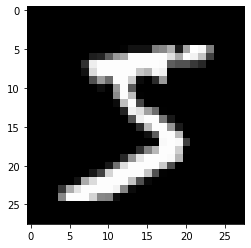

In [0]:
plt.imshow(x_train[0],cmap='gray')
plt.show()

In [0]:
X_train=x_train.reshape(-1,28,28,1)  #-1 is showing 60000    1 for 1-D ie gray.....if BRG then write 3 inplace of 1
X_test=x_test.reshape(-1,28,28,1)
print(X_train.shape,X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [0]:
Y_train=np_utils.to_categorical(y_train)  #one hard encoding----means if image is 5 then [0,0,0,0,0,1,0,0,0,0]
Y_test=np_utils.to_categorical(y_test)
print(Y_train.shape,Y_test.shape)

(60000, 10) (10000, 10)


In [0]:
X_train=X_train[:3600]
X_test=X_test[:900]

Y_train=Y_train[:3600]
Y_test=Y_test[:900]

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(3600, 28, 28, 1) (900, 28, 28, 1)
(3600, 10) (900, 10)


In [0]:
model=Sequential()
#(28,28,1)
model.add(Convolution2D(32,3,3,input_shape=(28,28,1)))  #32-no. of filters ,(3,3) is size of filter
model.add(Activation('relu'))
#(26,26,32)  32--depth ,(26=28-3+1)

model.add(Convolution2D(64,3,3))
model.add(Activation('relu'))
#(24,24,64)

model.add(MaxPooling2D(pool_size=(2,2)))   #features are reduced to 1/4
#(12,12,64)

model.add(Convolution2D(16,3,3))
model.add(Activation('relu'))
#(10,10,16)

model.add(Flatten())  #flatten image
#(1600)

model.add(Dropout(0.25))  #randomly 25 % weights will drop ie 25% weights will be zero

model.add(Dense(10))  #number of classes=10
model.add(Activation('softmax'))

model.summary()

C:\Users\RAHUL\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\RAHUL\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  import sys
C:\Users\RAHUL\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_9 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
activation_10 (Activation)   (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 16)        9232      
_________________________________________________________________
activation_11 (Activation)   (None, 10, 10, 16)        0         
__________

In [0]:
#320=32*3*3+32
#18496=32*3*3*64+64

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train,Y_train,
          validation_data=(X_test,Y_test),
          batch_size=20,
          nb_epoch=12,
          verbose=2)

C:\Users\RAHUL\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 3600 samples, validate on 900 samples
Epoch 1/12
 - 33s - loss: 1.5585 - acc: 0.6875 - val_loss: 0.4574 - val_acc: 0.8478
Epoch 2/12
 - 16s - loss: 0.3245 - acc: 0.9031 - val_loss: 0.2632 - val_acc: 0.9156
Epoch 3/12
 - 15s - loss: 0.1854 - acc: 0.9475 - val_loss: 0.1996 - val_acc: 0.9333
Epoch 4/12
 - 14s - loss: 0.1529 - acc: 0.9553 - val_loss: 0.1893 - val_acc: 0.9422
Epoch 5/12
 - 14s - loss: 0.0950 - acc: 0.9711 - val_loss: 0.1642 - val_acc: 0.9556
Epoch 6/12
 - 14s - loss: 0.0900 - acc: 0.9728 - val_loss: 0.3016 - val_acc: 0.9178
Epoch 7/12
 - 15s - loss: 0.0803 - acc: 0.9750 - val_loss: 0.2148 - val_acc: 0.9456
Epoch 8/12
 - 16s - loss: 0.0718 - acc: 0.9753 - val_loss: 0.1511 - val_acc: 0.9578
Epoch 9/12
 - 14s - loss: 0.0583 - acc: 0.9814 - val_loss: 0.1565 - val_acc: 0.9578
Epoch 10/12
 - 14s - loss: 0.0400 - acc: 0.9864 - val_loss: 0.1970 - val_acc: 0.9478
Epoch 11/12
 - 14s - loss: 0.0452 - acc: 0.9839 - val_loss: 0.1881 - val_acc: 0.9500
Epoch 12/12
 - 15s - loss: 